# Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing, differential_evolution, least_squares
import time
from math import exp, log10, sqrt
import random 
from anneal import SimAnneal


plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (5, 3.8)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

### Part 1.

Generate the noisy data $(x_k, y_k)$, according to the rule: 

$k=\overline{0, 1000}, \ x_k = \frac{3k}{1000}$, 
$f(x) = \frac{ax+b}{x^2 + cx + d}$:

$y_k = -100 + \delta_k$, if $f(x_k) <-100$;

$y_k = f(x_k) + \delta_k$, if $-100<f(x_k)<100$;

$y_k = 100 + \delta_k$, if $f(x_k)>100$.

In [2]:
def f_init(t):
    result = 1.0 / (t ** 2 - 3.0 * t + 2.0)
    
    if result < -100.0:
        result = -100.0
    elif result > 100.0:
        result = 100.0
        
    return result

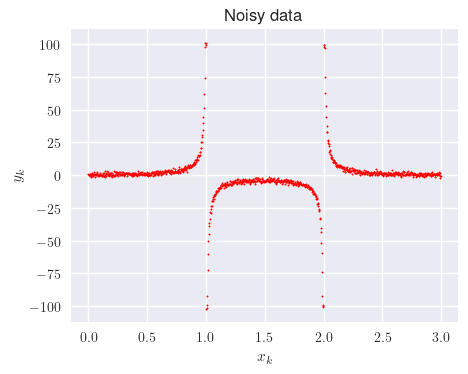

In [3]:
k = 1000

x_k = np.arange(0, k, 1) * 3 / k
delta = np.random.normal(0, 1, k)
y_k = np.array([f_init(t) for t in x_k]) + delta

plt.title(r'Noisy data')
plt.xlabel(r'$x_k$')
plt.ylabel(r'$y_k$')
plt.scatter(x_k, y_k, color='r', s=1)
fgnm = f'data.pdf'
plt.savefig("".join((fgnm)))

Definition of approximating function, function of loss and residuals function for Levenberg-Marquardt algorithm.
$p$ is vector of parameters: $p = (a, b, c, d)$

In [4]:
def f_fit(t, p): 
    return (p[0] * t + p[1]) / (t ** 2 + p[2] * t + p[3]) 
    
def f_loss(p, fit):
    result = 0
    for i in range(len(x_k)):
        result += (fit(x_k[i], p) - y_k[i]) ** 2
    return result

def residuals(p, fit):
    return np.array(fit(x_k, p) - y_k)

Definition of methods and calculation the execution time for each. The accuracy is $\varepsilon=0.001$, max number of iterations is 1000 (default in dif evolution and annealing methods)

In [5]:
def neldermead_search(func, x0, args):
    
    t = time.time()
    res = minimize(func, x0=x0, method='Nelder-Mead', args=(args,), tol=1e-3)
    t = round(time.time() - t, 5)
    
    return res, t

def levenberg_marquardt(func, x0, args):
    
    t = time.time()
    res = least_squares(func, method='lm', x0=x0, args=(args, ))
    t = round(time.time() - t, 5)
    
    return res, t

def dif_evolution(func, bounds, args):
    
    t = time.time()
    res = differential_evolution(func, bounds, args=(args, ))
    t = round(time.time() - t, 5)
    
    return res, t

def simulated_annealing(func, bounds, args):
    
    t = time.time()
    res = dual_annealing(func, bounds, args=(args, ), visit=1.1) # param is used to get closer to Classical Simulated Annealing
    t = round(time.time() - t, 5)
    
    return res, t

Here we set initial conditions for Nelder-Mead search and Levenberg-Marquardt algorithm. We also set bounds for stochastic and metaeuristic methods.

In [6]:
bounds = list(zip([-5] * 4, [5] * 4))
x0 = np.array([1] * 4)

An application of algorithms:

In [7]:
res_ann, t_ann = simulated_annealing(f_loss, bounds, f_fit)
res_difevol, t_difevol = dif_evolution(f_loss, bounds, f_fit)
res_lm, t_lm = levenberg_marquardt(residuals, x0, f_fit)
res_nm, t_nm = neldermead_search(f_loss, x0, f_fit)

Comparison of the number of function evaluation, number of iteration and execution time for each method:

In [8]:
res_ann.nit, res_ann.nfev, t_ann

(1000, 9066, 18.36457)

In [9]:
res_difevol.nit, res_difevol.nfev, t_difevol

(3, 960, 1.93152)

In [10]:
res_lm.nfev, t_lm

(177, 0.00669)

In [11]:
res_nm.nit, res_nm.nfev, t_nm

(379, 637, 1.28873)

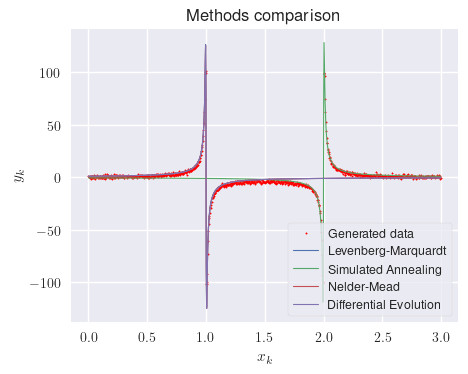

In [12]:
plt.title(r'Methods comparison')
plt.xlabel(r'$x_k$')
plt.ylabel(r'$y_k$')
plt.scatter(x_k, y_k, s=1, color='r',  label='Generated data')
plt.plot(x_k, f_fit(x_k, res_lm.x), linewidth=0.8, label='Levenberg-Marquardt')
plt.plot(x_k, f_fit(x_k, res_ann.x), linewidth=0.8, label='Simulated Annealing')
plt.plot(x_k, f_fit(x_k, res_nm.x), linewidth=0.8, label='Nelder-Mead')
plt.plot(x_k, f_fit(x_k, res_difevol.x), linewidth=0.8, label='Differential Evolution')
plt.legend(fontsize=9, frameon=True, loc='lower right')
fgnm = f'ones_init.pdf'
plt.savefig("".join((fgnm)))

In [13]:
bounds = list(zip([-5] * 4, [5] * 4))
x0 = np.array([0., 1., -3., 2.])

res_ann, t_ann = simulated_annealing(f_loss, bounds, f_fit)

res_difevol, t_difevol = dif_evolution(f_loss, bounds, f_fit)

res_lm, t_lm = levenberg_marquardt(residuals, x0, f_fit)

res_nm, t_nm = neldermead_search(f_loss, x0, f_fit)

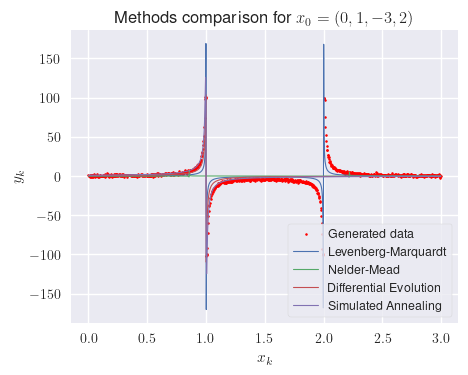

In [14]:
plt.title(r'Methods comparison for $x_0=(0, 1, -3, 2)$')
plt.xlabel(r'$x_k$')
plt.ylabel(r'$y_k$')
plt.scatter(x_k, y_k, s=1, color='r', linewidth=0.8, label='Generated data')
plt.plot(x_k, f_fit(x_k, res_lm.x), linewidth=0.8,  label='Levenberg-Marquardt')

plt.plot(x_k, f_fit(x_k, res_nm.x), linewidth=0.8,  label='Nelder-Mead')
plt.plot(x_k, f_fit(x_k, res_difevol.x), linewidth=0.8, label='Differential Evolution')
plt.plot(x_k, f_fit(x_k, res_ann.x), linewidth=0.8,  label='Simulated Annealing')
plt.legend(fontsize=9, frameon=True, loc='lower right')

fgnm = f'perf_init.pdf'
plt.savefig("".join((fgnm)))

### Part 2.

An application of the Simulated Annealing method to the Travelling Salesman Problem.


We use dataset from following website: https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html . The dataset SGB128 was chosen to compare performance of the algorithm when applied to different number of cities.

In [15]:
with open(file='sgb128_dist.txt') as f:
    matrix = np.array([list(map(int, row.split())) for row in f.readlines()])

with open(file='sgb128_xy.txt') as f:
    coords = np.array([list(map(float, row.split())) for row in f.readlines()])

Application of the Simulated annealing algorithm to the travelling salesman problem for 128 cities from chosen dataset:

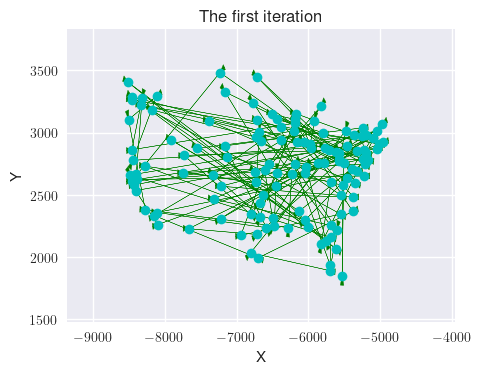

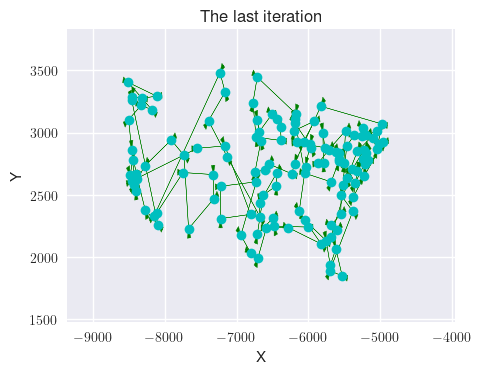

4160

In [16]:
sa = SimAnneal(coords, stopping_iter=5000)

sa.anneal()
sa.visualize_first_step()
sa.visualize_routes()
sa.iteration

The same as above, but for 32 cities:

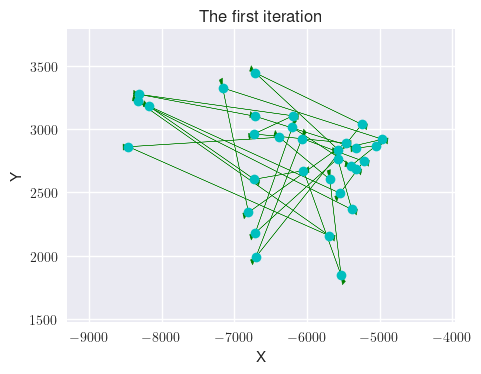

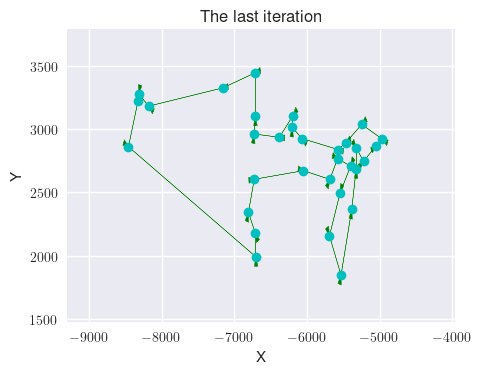

4022

In [17]:
coords = coords[:32]
sa = SimAnneal(coords, stopping_iter=5000)

sa.anneal()
sa.visualize_first_step()
sa.visualize_routes()
sa.iteration

Here we use greedy heuristic algorithm to find the best initial sequence of cities. We can see that results differ and the greedy algorithm returns better path. 

Best fitness obtained:  10384.238448469536
Improvement over greedy heuristic:  33.94%


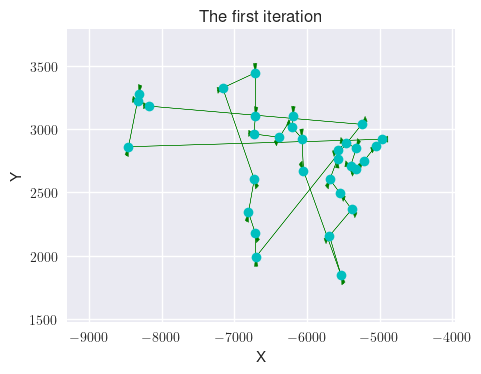

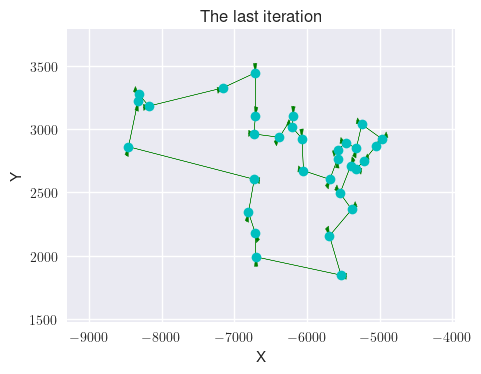

4022

In [19]:
sa = SimAnneal(coords, stopping_iter=5000, greedy=True)

sa.anneal()
sa.visualize_first_step()
sa.visualize_routes()
sa.iteration